In [21]:
# Import pustaka yang diperlukan
import pandas as pd
from IPython.display import display

# Membaca data dari file Excel
file_path = 'data.xlsx'
df = pd.read_excel(file_path)

# Menampilkan beberapa baris pertama data untuk verifikasi
print("Basis Pengetahuan:")
display(df.head())


Basis Pengetahuan:


,Nama Penyakit,Gejala,Bobot Gejala,Importance Penyakit
0,Karat Daun Kopi,Bercak kuning pada daun,0.8,0.9
1,Karat Daun Kopi,Tepung oranye di bawah daun,0.7,0.9
2,Karat Daun Kopi,Daun gugur,0.9,0.9
3,Karat Daun Kopi,Daun mengering,0.8,0.9
4,Karat Daun Kopi,Bercak cokelat bergabung membentuk\narea besar,0.8,0.9


In [23]:
def get_mass(df, disease):
    mass = {}
    filtered_df = df[df['Nama Penyakit'] == disease]
    for index, row in filtered_df.iterrows():
        symptom = row['Gejala']
        weight = row['Bobot Gejala']
        mass[symptom] = weight
    return mass

def combine_beliefs(mass1, mass2):
    combined_mass = {}
    for s1, m1 in mass1.items():
        for s2, m2 in mass2.items():
            if s1 == s2:
                combined_mass[s1] = combined_mass.get(s1, 0) + m1 * m2
            else:
                combined_mass[s1 + '|' + s2] = combined_mass.get(s1 + '|' + s2, 0) + m1 * m2

    # Normalisasi
    total_mass = sum(combined_mass.values())
    normalized_mass = {k: v / total_mass for k, v in combined_mass.items()}
    return normalized_mass

print("Fungsi Dumpster Shafer telah di Load")


Fungsi Dumpster Shafer telah di Load


In [51]:
import json


# Langkah 3: Membaca Data Dummy Gejala dari JSON
dummy_json_path = 'dummy_samples.json'
with open(dummy_json_path, 'r') as f:
    dummy_samples_json = json.load(f)

# Menampilkan beberapa data dalam bentuk tabel
sample_df_list = []
for i, sample in enumerate(dummy_samples_json[:5]):  # Hanya menampilkan 5 sampel pertama untuk contoh
    sample_df = pd.DataFrame(sample)
    sample_df['Sample'] = f'Sample {i+1}'
    sample_df_list.append(sample_df)

combined_sample_df = pd.concat(sample_df_list, ignore_index=True)
display(combined_sample_df.head)


<bound method NDFrame.head of                                     Gejala  Probabilitas    Sample
0                              Daun rontok          0.81  Sample 1
1                           Akar menghitam          0.82  Sample 1
2                               Daun gugur          0.60  Sample 1
3                    Pertumbuhan terhambat          0.72  Sample 1
4                           Daun menguning          0.84  Sample 1
5                               Buah pecah          0.81  Sample 1
6                           Akar menghitam          0.40  Sample 1
7                           Buah menghitam          0.59  Sample 1
8                              Buah berair          0.64  Sample 1
9                               Daun gugur          0.82  Sample 2
10                     Leher akar membusuk          0.77  Sample 2
11                     Leher akar membusuk          0.76  Sample 2
12                  Bercak hitam pada buah          0.50  Sample 2
13                             B

In [62]:
# Import pustaka yang diperlukan
import pandas as pd
from IPython.display import display

# Langkah 4: Menghitung Kemungkinan Penyakit Berdasarkan Gejala
def calculate_mass_functions(dummy_symptoms, df):
    masses = []
    for symptom in dummy_symptoms:
        gejala = symptom['Gejala']
        probability = symptom['Probabilitas']
        symptom_mass = df[df['Gejala'] == gejala][['Nama Penyakit', 'Bobot Gejala', 'Importance Penyakit']]
        if not symptom_mass.empty:
            symptom_mass['Mass'] = symptom_mass['Bobot Gejala'] * probability
            masses.append(symptom_mass)
    return masses

# Proses setiap sampel dalam loop
results = []
for i, sample in enumerate(dummy_samples_json):
    masses = calculate_mass_functions(sample, df)
    combined_mass = {}
    for j, mass in enumerate(masses):
        mass_dict = dict(zip(mass['Nama Penyakit'], mass['Mass']))
        if j == 0:
            combined_mass = mass_dict
        else:
            combined_mass = combine_beliefs(combined_mass, mass_dict)
    results.append(combined_mass)

# Menampilkan hasil dalam bentuk tabel
result_rows = []
for i, combined_mass in enumerate(results):
    if combined_mass:  # Periksa apakah combined_mass tidak kosong
        max_belief = max(combined_mass, key=combined_mass.get)
        max_prob = combined_mass[max_belief] * 100
        # Pisahkan penyakit berdasarkan probabilitas tertinggi saja
        max_belief = max_belief.split('|')[0]
        result_rows.append({'Sample': f'Sample {i+1}', 'Penyakit': max_belief, 'Probabilitas (%)': max_prob})
    else:
        result_rows.append({'Sample': f'Sample {i+1}', 'Penyakit': 'Tidak Diketahui', 'Probabilitas (%)': 0})

final_result_df = pd.DataFrame(result_rows)
display(final_result_df)

# Save the final_result_df to an Excel file
final_result_excel_path = 'final_result_df.xlsx'
final_result_df.to_excel(final_result_excel_path, index=False)

print("Tersimpan")



,Sample,Penyakit,Probabilitas (%)
0,Sample 1,Penyakit Mata Anjing,0.136631
1,Sample 2,Karat Daun Kopi,15.789474
2,Sample 3,Penyakit Busuk Pangkal Batang,0.865333
3,Sample 4,Penyakit Mata Anjing,15.789474
4,Sample 5,Karat Daun Kopi,100.000000
...,...,...,...
495,Sample 496,Penyakit Akar Merah,0.301290
496,Sample 497,Karat Daun Kopi,0.136631
497,Sample 498,Karat Daun Kopi,100.000000
498,Sample 499,Penyakit Ceri Kopi,100.000000


Tersimpan


In [63]:
# Langkah 5: Menampilkan Tabel dan Visualisasi Frekuensi Penyakit

# Menampilkan hasil dalam bentuk tabel
result_rows = []
for i, combined_mass in enumerate(results):
    if combined_mass:  # Periksa apakah combined_mass tidak kosong
        max_belief = max(combined_mass, key=combined_mass.get)
        max_prob = combined_mass[max_belief] * 100
        # Pisahkan penyakit berdasarkan probabilitas tertinggi saja
        max_belief = max_belief.split('|')[0]
        result_rows.append({'Sample': f'Sample {i+1}', 'Penyakit': max_belief, 'Probabilitas (%)': max_prob})
    else:
        result_rows.append({'Sample': f'Sample {i+1}', 'Penyakit': 'Tidak Diketahui', 'Probabilitas (%)': 0})

final_result_df = pd.DataFrame(result_rows)

# Menghitung frekuensi penyakit
frequency_df = final_result_df['Penyakit'].value_counts().reset_index()
frequency_df.columns = ['Penyakit', 'Frekuensi']

# Menghitung persentase frekuensi penyakit
total_samples = len(final_result_df)
frequency_df['Persentase (%)'] = (frequency_df['Frekuensi'] / total_samples) * 100

# Menampilkan tabel frekuensi penyakit
display(frequency_df)




,Penyakit,Frekuensi,Persentase (%)
0,Karat Daun Kopi,125,25.0
1,Penyakit Ceri Kopi,90,18.0
2,Penyakit Mata Anjing,63,12.6
3,Penyakit Busuk Buah,54,10.8
4,Penyakit Akar Merah,53,10.6
5,Penyakit Busuk Pangkal Batang,38,7.6
6,Penyakit Akar Hitam,27,5.4
7,Penyakit Busuk Leher,26,5.2
8,Penyakit Embun Tepung,24,4.8


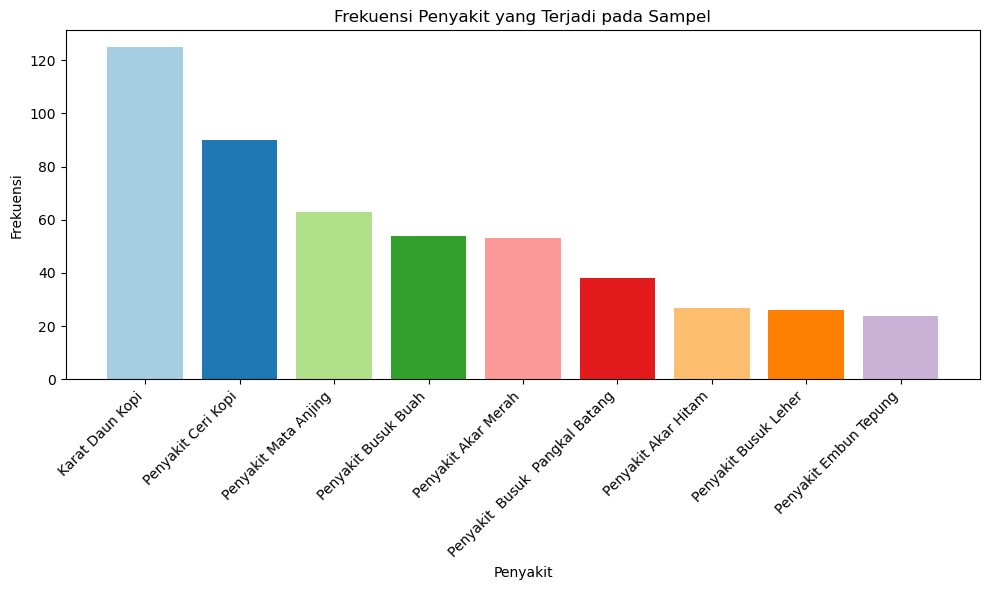

In [64]:
# Visualisasi frekuensi penyakit dengan warna berbeda untuk setiap bar
colors = plt.cm.Paired(range(len(frequency_df)))

plt.figure(figsize=(10, 6))
plt.bar(frequency_df['Penyakit'], frequency_df['Frekuensi'], color=colors)
plt.xlabel('Penyakit')
plt.ylabel('Frekuensi')
plt.title('Frekuensi Penyakit yang Terjadi pada Sampel')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()